# House Prices Project

In [365]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("the shape of the training set: ", train.shape)
print("the shape of the testing set: ", test.shape)
print("number of duplicates in the training set: ", train.duplicated().sum())
print("number of duplicates in the testing set: ", test.duplicated().sum())

the shape of the training set:  (1460, 81)
the shape of the testing set:  (1459, 80)
number of duplicates in the training set:  0
number of duplicates in the testing set:  0


In [366]:
missing_col = set(train.columns) - set(test.columns)
print("the test does not have a " + str(missing_col) + " column")

the test does not have a {'SalePrice'} column


note; the test set is for validation.

## Data Vis

<AxesSubplot:>

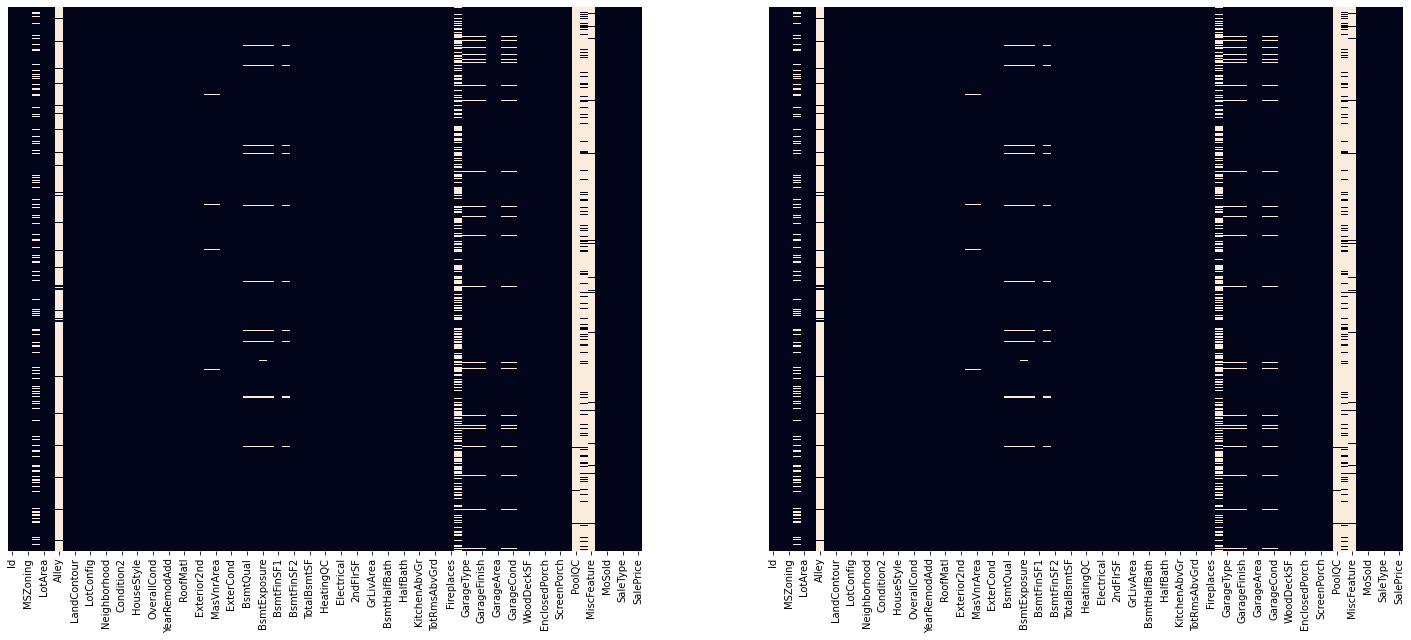

In [367]:
fig, ax = plt.subplots(ncols = 2, figsize=(25, 10))
sns.heatmap(data=train.isnull(), yticklabels=False, ax=ax[0], cbar=False)
sns.heatmap(data=train.isnull(), yticklabels=False, ax=ax[1], cbar=False)

Missing values are visualisd in white.

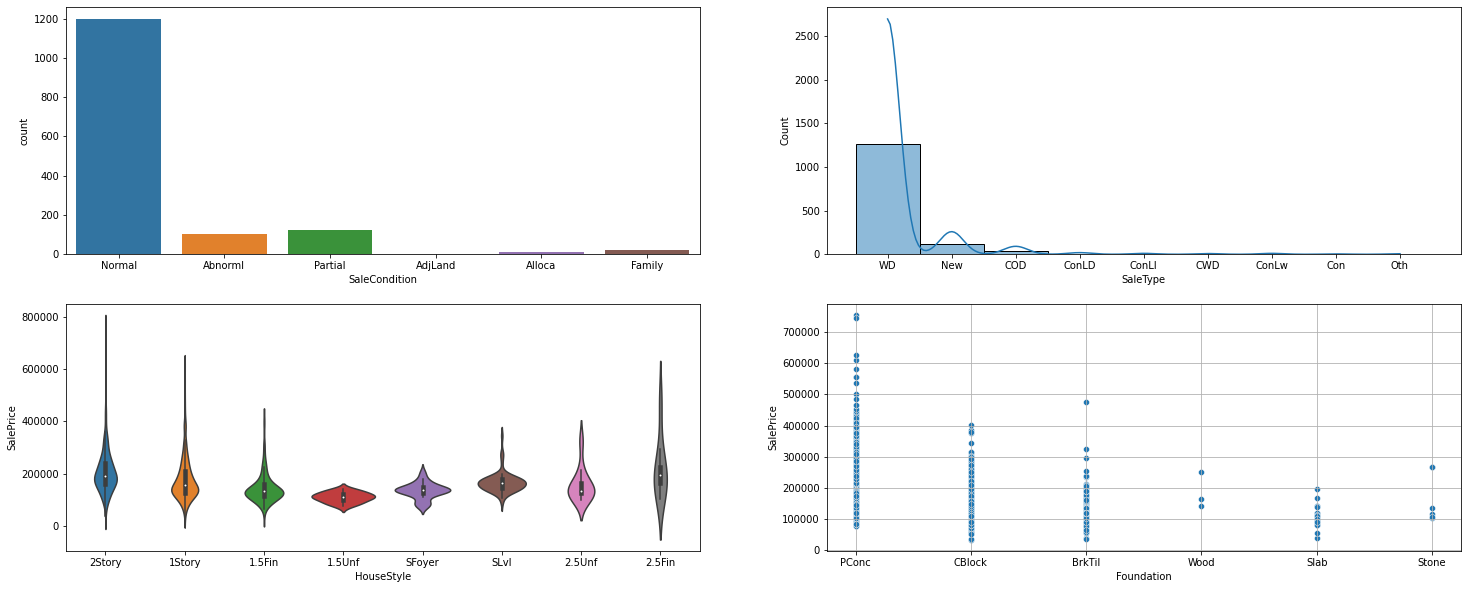

In [368]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.countplot(x=train['SaleCondition'],ax=ax[0][0])
sns.histplot(x=train['SaleType'], kde=True, ax=ax[0][1])
sns.violinplot(x=train['HouseStyle'], y=train['SalePrice'], ax=ax[1][0])
sns.scatterplot(x=train['Foundation'], y=train["SalePrice"], ax=ax[1][1])
plt.grid()


## Data Clean-Up

In [369]:
missing_val_col = [
    "FireplaceQu", "BsmtQual", "BsmtCond", 
    "BsmtFinType1", "BsmtFinType2"
    ]

for x in missing_val_col:
    train[x].fillna("No", inplace=True)
    test[x].fillna("No", inplace=True)

test["KitchenQual"].fillna("TA", inplace=True)

def fill_missing_values(data):

    for col in data.columns:
        if ((data[col].dtype == 'float64') or (data[col].dtype == 'int64')): 
            data[col].fillna(data[col].mean(), inplace=True)
    
    else: data[col].fillna(train[col].mode()[0], inplace=True)

fill_missing_values(train)
fill_missing_values(test)

drop_col = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MoSold', 'YrSold', 'MSSubClass',
            'GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'YearRemodAdd', 'LandSlope',
            'BsmtUnfSF', 'BsmtExposure', '2ndFlrSF', 'LowQualFinSF', 'Condition1', 'Condition2', 'Heating',
             'Exterior1st', 'Exterior2nd', 'HouseStyle', 'LotShape', 'LandContour', 'LotConfig', 'Functional',
             'BsmtFinSF1', 'BsmtFinSF2', 'FireplaceQu', 'WoodDeckSF', 'GarageQual', 'GarageCond', 'OverallCond', 'CentralAir']

train.drop(drop_col, axis=1, inplace=True)
test.drop(drop_col, axis=1, inplace=True)

the shape of the training set:  (1460, 45)
the shape of the testing set:  (1459, 44)


## Variable Encoding
One hot encoding for catergorical variable and ordinal codes assigned to variables with ranked levels.

In [370]:
OH_col = [
    "MSZoning", "Street", "Utilities", 
    "Neighborhood", "BldgType", "RoofStyle", 
    "RoofMatl", "MasVnrType", "Foundation", 
    "Electrical", "SaleType", "SaleCondition"
]

all_OH = pd.concat([train[OH_col], test[OH_col]], axis=0)
all_OH_dummies = pd.get_dummies(all_OH)

train_oh, test_OH = all_OH_dummies.iloc[:train.shape[0]], all_OH_dummies.iloc[train.shape[0]:]


In [371]:
#columns with ordinal variables are encoded with the appropriate class from sklearn

from sklearn.preprocessing import OrdinalEncoder

ORD_col = [
    "ExterQual", "ExterCond", "BsmtQual",
    "BsmtCond", "BsmtFinType1", "BsmtFinType2",
    "HeatingQC", "KitchenQual", "PavedDrive",
]

ord = OrdinalEncoder(categories=[["Po", "Fa","TA","Gd","Ex"]])
train["ExterQual"] = ord.fit_transform(train[["ExterQual"]].values)
test["ExterQual"] = ord.transform(test[["ExterQual"]].values)

train["ExterCond"] = ord.fit_transform(train[["ExterCond"]])
test["ExterCond"] = ord.transform(test[["ExterCond"]])

train["HeatingQC"] = ord.fit_transform(train[["HeatingQC"]])
test["HeatingQC"] = ord.transform(test[["HeatingQC"]])

train["KitchenQual"] = ord.fit_transform(train[["KitchenQual"]])
test["KitchenQual"] = ord.transform(test[["KitchenQual"]])

ord = OrdinalEncoder(categories=[["No", "Po", "Fa", "TA", "Gd", "Ex"]])
train["BsmtQual"] = ord.fit_transform(train[["BsmtQual"]])
test["BsmtQual"] = ord.transform(test[["BsmtQual"]])

train["BsmtCond"] = ord.fit_transform(train[["BsmtCond"]])
test["BsmtCond"] = ord.transform(test[["BsmtCond"]])

ord = OrdinalEncoder(categories=[["No", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]])
train["BsmtFinType1"] = ord.fit_transform(train[["BsmtFinType1"]])
test["BsmtFinType1"] = ord.transform(test[["BsmtFinType1"]])

train["BsmtFinType2"] = ord.fit_transform(train[["BsmtFinType2"]])
test["BsmtFinType2"] = ord.transform(test[["BsmtFinType2"]])

ord = OrdinalEncoder(categories=[["N", "P", "Y"]])
train["PavedDrive"] = ord.fit_transform(train[["PavedDrive"]])
test["PavedDrive"] = ord.transform(test[["PavedDrive"]])

In [372]:
train = pd.concat([train.drop(OH_col, axis=1), train_OH], axis=1)
test = pd.concat([test.drop(OH_col, axis=1), test_OH], axis=1)

print("the shape of the training set: ", train.shape)
print("the shape of the testing set: ", test.shape)

the shape of the training set:  (1460, 116)
the shape of the testing set:  (1459, 115)


## Model fit, evalualtion and prediction

In [373]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

X, y = train.drop("SalePrice", axis=1), train["SalePrice"]

params = {
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "n_estimators" : [100, 200, 300, 400, 600],
}

model = xgb.XGBRegressor(objective="reg:squarederror")
grid_search = GridSearchCV(model, param_grid=params, cv=5)
grid_search.fit(X,y)
print("Best parameters found: ", grid_search.best_params_)
print("Training r2score: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Training r2score:  0.8627646900098412


In [374]:
model = xgb.XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=200, max_depth=3,
    learning_rate=0.1 )
model.fit(X, y)
sub = model.predict(test)

In [375]:
sub = pd.DataFrame(
    model.predict(test), 
    columns=["SalePrice"], 
    index=range(1461, 1461+len(test)))
sub.index.name = "Id"
sub.to_csv("submission.csv")